In [2]:
import h5py
import astropy.units as u
import numpy as np
from astropy.io import fits
import numpy as np

# Sample data with units (replace with your actual data)
# For example purposes, we're assuming some values
from astropy import units as u
fn = '/Users/wasi/Downloads/galaxy_galplane_l50_b0.hdf'

avail_fields = [
    'RA', 'DEC', 'longitude', 'latitude', 'distance', 'distance_mod',
    'age', 'mass', 'metallicity', 'vx', 'vy', 'vz',
    # Castor bands
    'CASTOR_u_app', 'CASTOR_uv_app', 'CASTOR_g_app',
    'CASTOR_u_split_bb_app', 'CASTOR_uv_split_bb_app',
    # LSST bands
    'LSST_u_app', 'LSST_g_app', 'LSST_r_app',
    'LSST_i_app', 'LSST_z_app', 'LSST_y_app',
    # WFIRST bands
    'R062_app', 'Z087_app', 'Y106_app', 'J129_app', 'W146_app',
    'H158_app', 'F184_app'
]

data = dict()

with h5py.File(fn, 'r') as datafile:
    for key in avail_fields:
        dataset = datafile[key]
        data[key] = dataset[:]
        if 'unit' in dataset.attrs:
            data[key] <<= u.Unit(dataset.attrs['unit'])


In [6]:
#data.keys()
#type(data['RA'])
data['CASTOR_u_app']
data['RA']
data['DEC'][:10]     

<Quantity [-62.32119283, -61.97503571, -61.92149508, -62.11411786,
           -62.11262371, -61.4375629 , -61.8929521 , -62.06051196,
           -61.72233428, -61.74235807] deg>

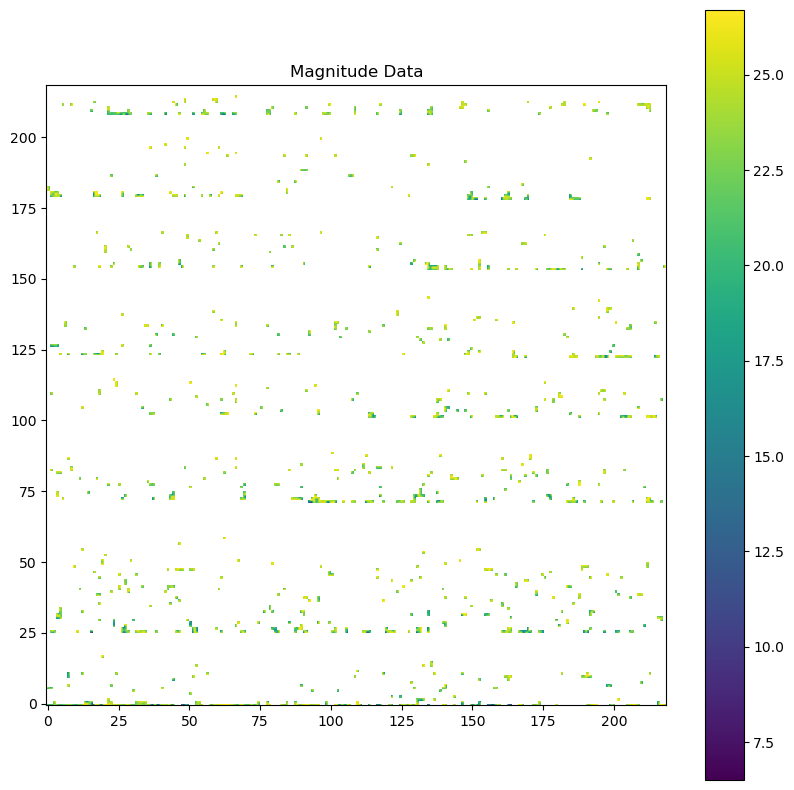

In [9]:
# Extract numerical values from arrays with units
u_app_no_units = data['CASTOR_u_app'].value
ra_no_units = data['RA'].to(u.arcsec).value
dec_no_units = data['DEC'].to(u.arcsec).value

# Create Primary HDU for the magnitude data
hdu_u_app = fits.PrimaryHDU(data=u_app_no_units)
hdu_u_app.header['EXTNAME'] = 'MAGNITUDE'

# Create HDU for RA
hdu_ra = fits.ImageHDU(data=ra_no_units)
hdu_ra.header['EXTNAME'] = 'RA'

# Create HDU for DEC
hdu_dec = fits.ImageHDU(data=dec_no_units)
hdu_dec.header['EXTNAME'] = 'DEC'

# Create an HDU list and write to file
hdul = fits.HDUList([hdu_u_app, hdu_ra, hdu_dec])
hdul.writeto('image.fits', overwrite=True)

# Reading the FITS file and plotting the magnitude data
with fits.open('image.fits') as hdul:
    u_app_data = hdul['MAGNITUDE'].data

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# For demonstration, reshaping data into 2D if necessary
# If your data is 1D, you may need to reshape or plot accordingly
# Example: Reshape into 2D (adjust dimensions as needed)
if u_app_data.ndim == 1:
    height = int(np.sqrt(u_app_data.size))  
    width = u_app_data.size // height
    u_app_data = u_app_data[:height * width].reshape((height, width))

plt.figure(figsize=(10, 10))
plt.imshow(u_app_data, cmap='viridis', origin='lower')  # Added origin='lower' for correct orientation
plt.colorbar()
plt.title('Magnitude Data')
plt.show()

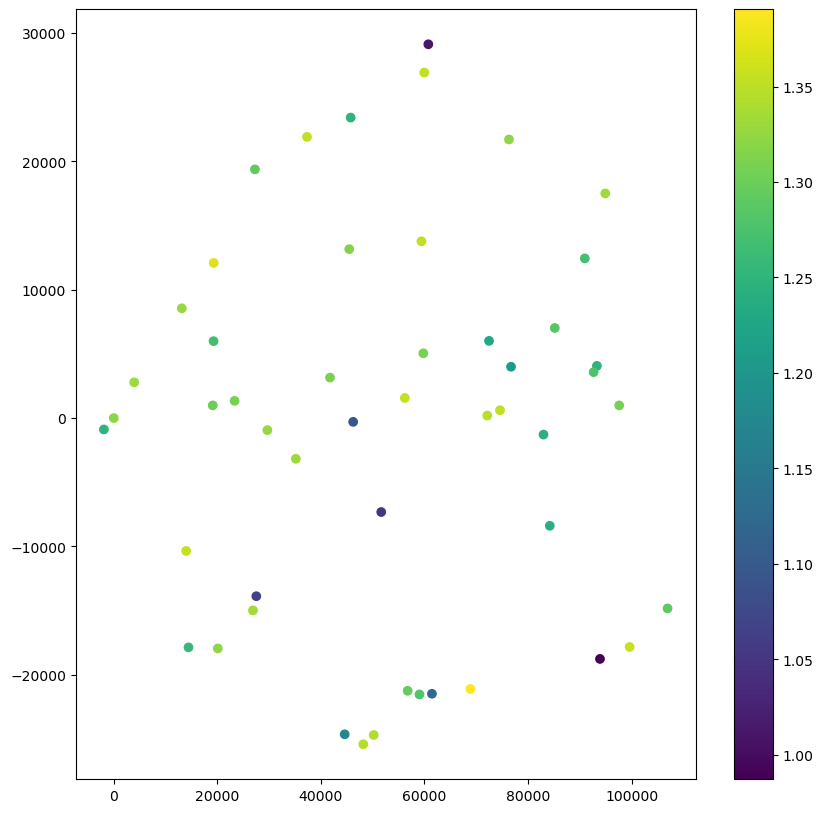

NotImplementedError: cannot write Quantities to file.  Write array with q.value.tofile(...)

In [25]:
data.keys()
cut_ra=data.get('RA')[:50]
cut_dec=data.get('DEC')[:50]
cut_g_mag=data.get('CASTOR_g_app')[:50]
# The above values of the cut pperformed are in degrees. Covert into arcseconds
cut_ra_arcsec=cut_ra.to(u.arcsec)
cut_dec_arcsec=cut_dec.to(u.arcsec)

# Now use the pixel scale to convert the ra and dec into pixel values. We use a pixel scale of 0.1 arcsec/pixel. Then add the magnitude values corresponding to index of the pixel values.

pixel_scale=0.1*u.arcsec/u.pixel
cut_ra_pixel=cut_ra_arcsec/pixel_scale
cut_dec_pixel=cut_dec_arcsec/pixel_scale

# print cut_ra_pixel and cut_dec_pixel to get the pixel values of ra and dec
#print(cut_ra_pixel)
#print(cut_dec_pixel)

# Now take the middle values of both cut_ra_pixel and cut_dec_pixel and that will be the cente of the image. Then take the difference of the pixel values of ra and dec from the center values to get the pixel values of the ra and dec in the image.

center_ra_pixel=cut_ra_pixel[25]
center_dec_pixel=cut_dec_pixel[25]
cut_ra_pixel_centered=cut_ra_pixel-center_ra_pixel
cut_dec_pixel_centered=cut_dec_pixel-center_dec_pixel

# do a log scale of the pixel values of the magnitude values
cut_g_mag_log=np.log10(cut_g_mag)

# Now we have the pixel values of ra, dec and the log scale of the magnitude values. We can now plot the image using the pixel values of ra, dec and the log scale of the magnitude values.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cut_ra_pixel_centered,cut_dec_pixel_centered,c=cut_g_mag_log)
plt.colorbar()
plt.show()







In [28]:
# I have the pixel values in x,y and the star magnitude. The x = cut_ra_pixel_centered y= cut_dec_pixel_centered,mag =cut_g_mag_log. All the three are arrays. I want to write it to a fits file. I will use astropy to do this.

from astropy.io import fits

hdu = fits.PrimaryHDU()
hdu.data = cut_g_mag_log
hdu.header['RA'] = cut_ra 
hdu.header['DEC'] = cut_dec
hdu.header['MAG'] = cut_g_mag_log
hdu.writeto('image.fits', overwrite=True)

# Now the image.fits file is created. I will now read the file and plot the image using the pixel values of ra, dec and the log scale of the magnitude values.

image_data = fits.getdata('image.fits')
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='hot')
plt.colorbar()
plt.show()

ValueError: Illegal value: <Quantity [208.79833035, 209.05117206, 206.99456539, 207.28330026,
           206.40628365, 207.72998629, 208.82512913, 206.99014003,
           207.72245583, 208.98627278, 208.59038493, 209.43006279,
           207.21645797, 209.22675383, 207.79777332, 208.03583683,
           207.8941983 , 208.02067101, 208.462972  , 208.16620089,
           206.9954618 , 207.49591713, 208.10978497, 206.56863738,
           207.85373612, 206.45936531, 208.11997821, 206.86019412,
           208.5312554 , 207.20601003, 208.76473881, 208.09915165,
           208.57931403, 209.09600313, 209.03349147, 207.43604779,
           209.17062792, 207.22395001, 208.12483955, 209.06762392,
           207.1073399 , 207.01739391, 207.61929624, 206.84752665,
           207.69801881, 206.82426474, 208.37228792, 207.74349786,
           208.14670836, 208.47236289] deg>.

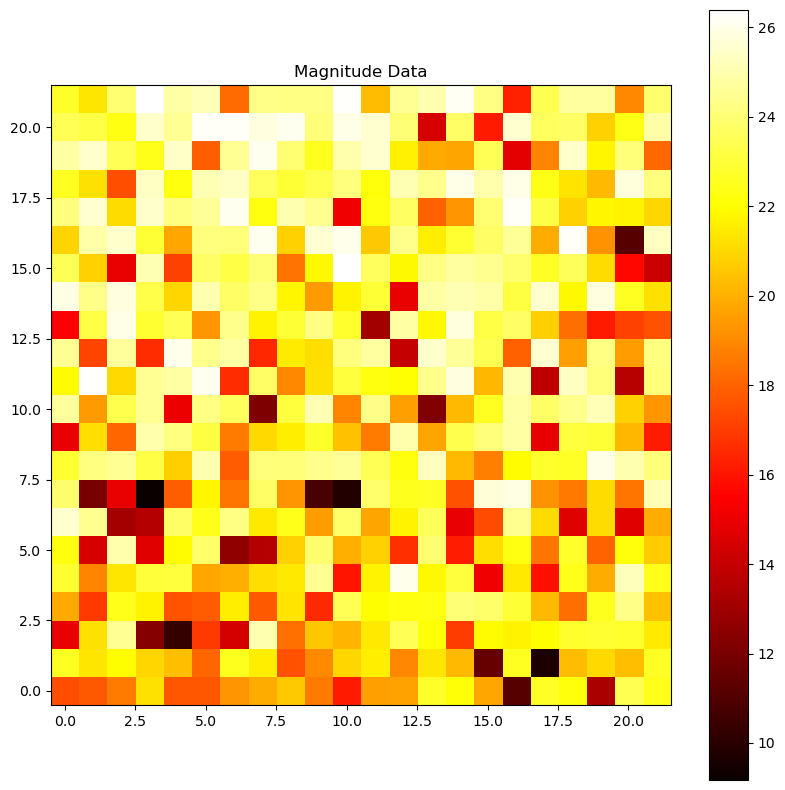

In [35]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Create Primary HDU for the magnitude data
hdu_mag = fits.PrimaryHDU(data=data.get('CASTOR_g_app')[:500].value)
hdu_mag.header['EXTNAME'] = 'MAGNITUDE'

# Create HDU for RA
hdu_ra = fits.ImageHDU(data=data.get('RA')[:500].value)
hdu_ra.header['EXTNAME'] = 'RA'

# Create HDU for DEC
hdu_dec = fits.ImageHDU(data=data.get('DEC')[:500].value)
hdu_dec.header['EXTNAME'] = 'DEC'

# Create an HDU list and write to file
hdul = fits.HDUList([hdu_mag, hdu_ra, hdu_dec])
hdul.writeto('image.fits', overwrite=True)

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Read FITS file and get data
with fits.open('image.fits') as hdul:
    image_data = hdul['MAGNITUDE'].data

# Check if data is 1D and reshape if necessary
if image_data.ndim == 1:
    # Example: reshape the 1D array into a 2D array
    # You need to know the correct dimensions for this
    height = int(np.sqrt(image_data.size))  # Just an example; adjust as needed
    width = image_data.size // height
    image_data = image_data[:height*width].reshape((height, width))

plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='hot', origin='lower')  # Added origin='lower' for correct orientation
plt.colorbar()
plt.title('Magnitude Data')
plt.show()

